# Colab安装conda和rdkit

In [2]:
# Install rdkit 2020.09.1 on Colab. 
# If you have been installED rdkit, just ignore this Cell.
!pip install kora -q
import kora.install.rdkit

     |████████████████████████████████| 57 kB 2.1 MB/s 
     |████████████████████████████████| 56 kB 3.1 MB/s 


In [1]:
!git clone https://github.com/rdkit/rdkit-tutorials

Cloning into 'rdkit-tutorials'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 255 (delta 15), reused 31 (delta 15), pack-reused 222
Receiving objects: 100% (255/255), 3.50 MiB | 15.79 MiB/s, done.
Resolving deltas: 100% (119/119), done.


# SMARTS的用法

## 1.导入基础模块

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

## 2.定义化学分子

In [4]:
smiles_list= ['CCCCC', 'CCNOCC', 'CSCCNC', 'COOCCNS', 'CSNNSP', 'CCCCS']
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

## 3.分子结构可视化

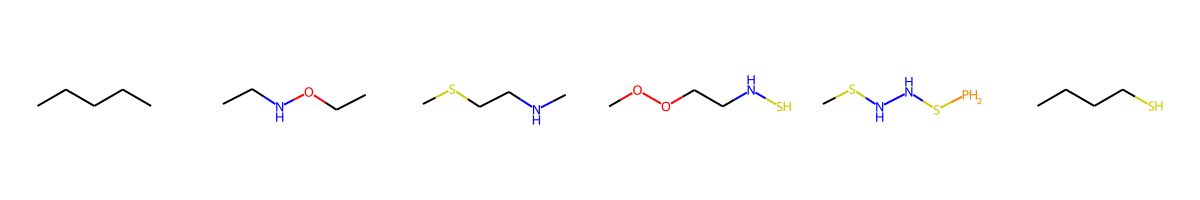

In [5]:
MolsToGridImage(mol_list, molsPerRow=6)

## 4.建立一个查询请求

In [14]:
# 查找由3个碳原子组成的脂肪链
query = Chem.MolFromSmarts('CCC')
query

## 5.查找匹配

In [7]:
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
match_list
#[(0, 1, 2), (), (), (), (), (0, 1, 2)]， 
#代表第1个mol对象（’CCCCC‘）分子和第6个’CCCCS’分子，有三个部分与query相似。查询结果确实符合我们的query.

[(0, 1, 2), (), (), (), (), (0, 1, 2)]

## 6.可视化

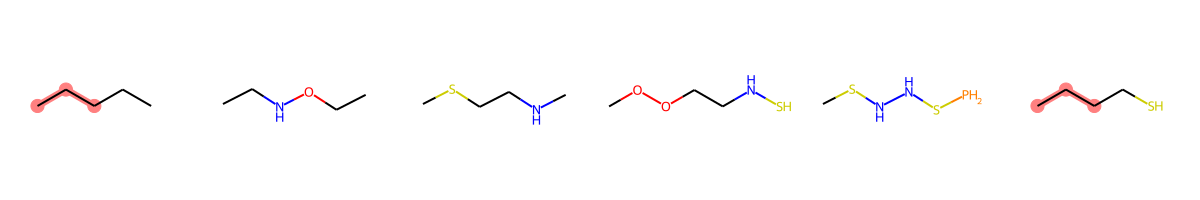

In [8]:
MolsToGridImage(mols = mol_list, highlightAtomLists=match_list, molsPerRow=6)

## 7.匹配特定模式的分子
SMARTS中，*可以代替任何的原子，例如：

[(0, 1, 2), (), (0, 1, 2), (), (), (0, 1, 2)]


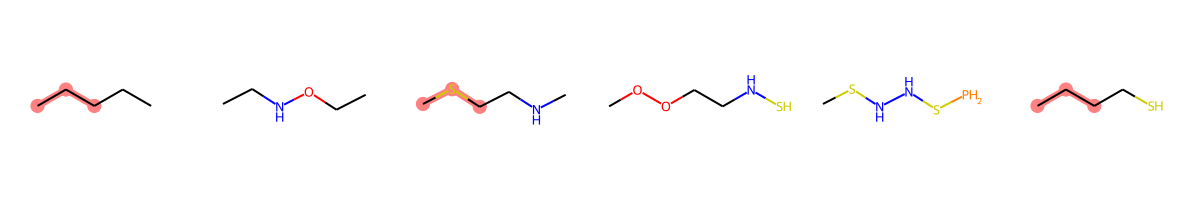

In [9]:
query = Chem.MolFromSmarts('C*C')
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
print(match_list)
MolsToGridImage(mols=mol_list, highlightAtomLists=match_list, molsPerRow=6)

SMARTS中，[]代表中括号中间的一个原子可以是N，也可以是C，例如：

[(0, 1, 2), (), (3, 4, 5), (), (), (0, 1, 2)]


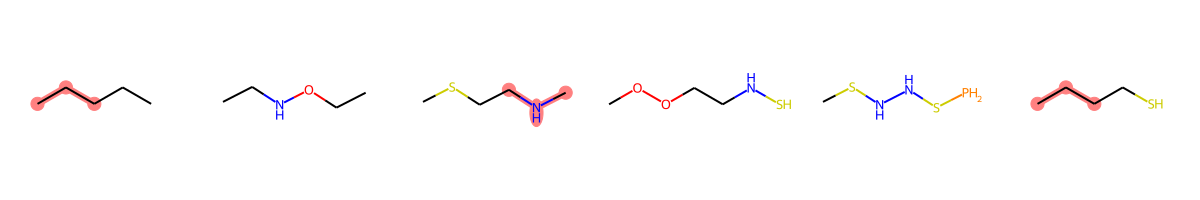

In [10]:
query = Chem.MolFromSmarts('C[N,C]C')
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
print(match_list)
MolsToGridImage(mols=mol_list, highlightAtomLists=match_list, molsPerRow=6)

## 8.备注

SMARTS还可以有其他复杂的功能，需要去google一下。